In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [43]:
oil = pd.read_csv(r"..\Data\01_raw\oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [44]:
oil.shape

(1218, 2)

In [45]:
output = []

for column in oil.columns:

    null_values  = np.sum(pd.isna(oil[column]))
    unique = oil[column].nunique()
    column_data_type = oil[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = oil.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
date,0,1218,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dcoilwtico,43,998,float64,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


In [46]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear')

In [47]:
np.sum(pd.isna(oil))

c:\Users\User131f\Desktop\Capstone\Capstone-Project\venv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


date          0
dcoilwtico    1
dtype: int64

In [48]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [49]:
oil['dcoilwtico'][0] = 93.14

C:\Users\User131f\AppData\Local\Temp\ipykernel_9280\744257362.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  oil['dcoilwtico'][0] = 93.14
C:\Users\User131f\AppData\Local\Temp\ipykernel_9280\744257362.py:1: SettingWithCopyWarning: 
A val

In [50]:
# oil.to_csv(r"C:\Users\User131f\Desktop\Capstone\Capstone-Project\Data\02_intermediate\oil_intermediate.csv")

In [51]:
oil_intermediate = pd.read_csv(r"..\Data\02_intermediate\oil_intermediate.csv")
oil_intermediate.head()

,Unnamed: 0,date,dcoilwtico
0,0,2013-01-01,93.14
1,1,2013-01-02,93.14
2,2,2013-01-03,92.97
3,3,2013-01-04,93.12
4,4,2013-01-07,93.20


In [52]:
oil_intermediate.drop('Unnamed: 0', axis =1, inplace=True)

In [53]:
oil_intermediate.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [54]:
oil.drop_duplicates(inplace=True)

In [55]:
oil.shape

(1218, 2)

<Axes: ylabel='dcoilwtico'>

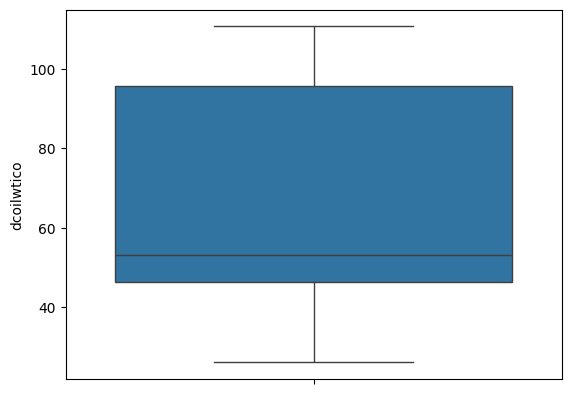

In [56]:
sns.boxplot(y=oil['dcoilwtico'] )

Outlier detection for column dcoilwtico. No outliers found.

Hyppothesis: Oil price suddenly decreased in 2016 as Ecuador was heavily affected by earthquake.


([<matplotlib.axis.XTick at 0x279a102afb0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

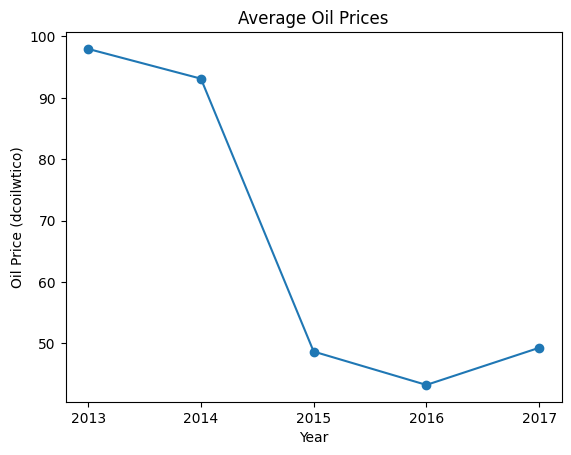

In [57]:
oil_intermediate['year'] = pd.DatetimeIndex(oil_intermediate['date']).year

yearly_data = oil_intermediate.groupby('year')['dcoilwtico'].mean().reset_index()
plt.plot(yearly_data['year'], yearly_data['dcoilwtico'], marker='o')
plt.title('Average Oil Prices')
plt.xlabel('Year')
plt.ylabel('Oil Price (dcoilwtico)')
plt.xticks(range(2013, 2018))

Oil Price decreased in 2015.

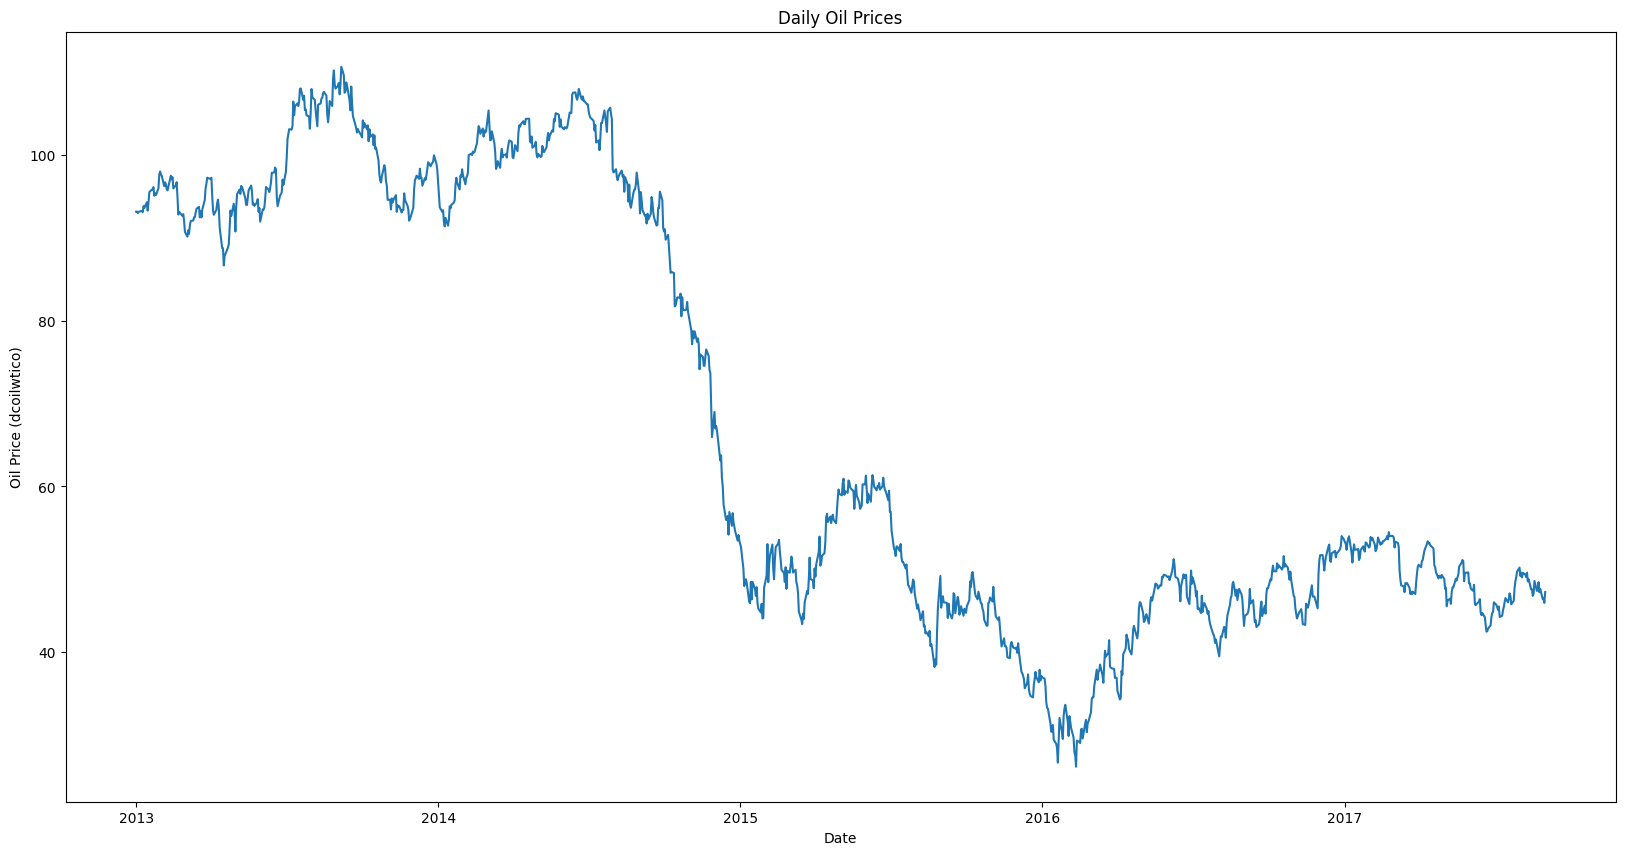

In [58]:
oil_intermediate['date'] = pd.to_datetime(oil_intermediate['date'])

plt.figure(figsize=(20, 10))
plt.plot(oil_intermediate['date'], oil_intermediate['dcoilwtico'], linestyle='-')
plt.title('Daily Oil Prices')
plt.xlabel('Date')
plt.ylabel('Oil Price (dcoilwtico)')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#plt.savefig("..\Reports\Daily_oil_prices.png")

Highest oil price was recorded around 2014 and the lowest was recorded in 2016 as eucador was hit with earthquake.

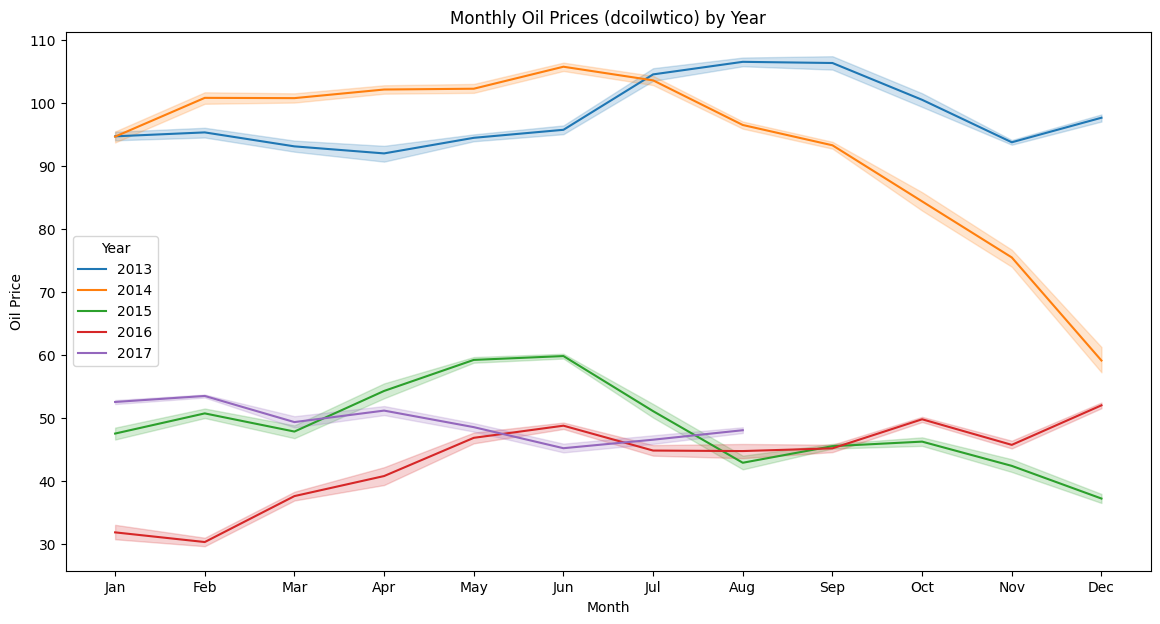

In [59]:

oil_intermediate['month'] = oil_intermediate['date'].dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 7))
sns.lineplot(data=oil_intermediate, x='month', y='dcoilwtico', hue='year', palette='tab10')
plt.title('Monthly Oil Prices (dcoilwtico) by Year')
plt.xlabel('Month')
plt.ylabel('Oil Price')
plt.legend(title='Year')
plt.xticks(ticks=range(1, 13), labels=month_names)
plt.show()


Oil price is considerably low for year 2015, 2016, 2017.